Un cammino 2-Motzkin è un cammino nel piano di lunghezza $n$ con inizio in $(0, 0)$ e fine in $(n, 0)$ in cui i possibili passi sono: $U$ muove verso l'alto a destra, $D$ muove verso il basso a destra, $L$ muove in orizzontale. Abbiamo passi orizzontali di due colori diversi: rosso e verde. Un cammino 2-Motzkin si trova sempre all'interno del semipiano positivo.

In questo Notebook verifico che il numero di cammini 2-Motzkin è uguale a $$C^2=\frac{1}{n+1}\binom{2n+2}{n}$$

Identifichiamo ogni possibile passo con un numero intero positivo: 0 movimento verso l'alto a destra, 1 movimento in orizzontale rosso, 2 movimento orizzontale verde, 3 movimento verso il basso a destra. L'idea consiste ne determinare tutte le sequenze di lunghezza $n$ composte da 4 elementi (0, 1, 2 e 3) ed eliminare le sequenze che non rappresentano un cammino 2-Motzkin. Dopodiché verifico che il numero di cammini ottenuti è uguale a $C^2$

In [3]:
from sympy.abc import * # a collection of already-defined terms, such as `alpha, a, b, x, y, t, ...`

from sympy import *
from sympy.plotting import plot

In [4]:
from commons import * # import our own functions, to define things in particular.

In [5]:
init_printing()

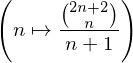

In [6]:
#definisco C2
C2=Lambda([n], 1/(n+1)*binomial((2*n+2),n))
C2

In [7]:
C2(3)

In [8]:
#crea tutte le possibili sequenze di lunghezza N composte da solo n elementi

def createAllSequenceList(N, n):
    result=[]
    x=[0 for i in range(N)]
    result.append(x.copy())

    j=N-1
    k=N-1
    while k>=0:
        if x[j]+1==n:
            k=j
            while x[k]+1==n and k>=0:
                k=k-1
            if k>=0:
                x[k]=x[k]+1
                j=N-1
                for i in range(k+1, N):
                    x[i] = 0
        else:
            x[j]=x[j]+1
        result.append(x.copy())
    result.pop()
    return result

In [9]:
myList=createAllSequenceList(5,4)
myList

In [14]:
len(myList)

In [15]:
pow(4,5)

In [16]:
#Data la lista delle sequenze di dimensione N con numeri fra 0 e 3. Restituisco le sequenze che rappresentano i cammini
#2-Motzkin di lunghezza N

def find2MontzkinPath(N, L):
    temp=L.copy()
    for k in range(len(temp)):
        s=temp[k]
        stack=[]
        for i in range(N):
            if s[i]==0:
                stack.append(0)
            if s[i]==3:
                if len(stack)!=0:
                    stack.remove(0)
                else:
                    temp[k]=0
        if len(stack)>0:
            temp[k] = 0

    result=[]
    for i in range(len(temp)):
        if temp[i]!=0:
            result.append(temp[i])
    return result


In [17]:
C2(5)

In [18]:
Motzkin2PathInMyList=find2MontzkinPath(5, myList)
len(Motzkin2PathInMyList)

Si procede quindi con la generazione dei 2-Motzkin Fine paths, ossia dei cammini 2-Motzkin senza level steps ad altezza 0, come sopra indichiamo con: 
$U=(1,1)$ -> up step,
$D=(1,-1)$ -> down step,
$L=(1,0)$ -> level step, questi ultimi possono essere rossi o verdi

In [31]:
def find2MontzkinFinePath(stepNumber, list):
    listCopy=list.copy()
    for k in range(len(listCopy)):
    	height=0;
    	s=listCopy[k]
    	stack=[]
    	for i in range(stepNumber):
    		if s[i]==0:
    			height=height+1
    		if s[i]==3:
    			height=height-1
    		else:
    			if (height==0):
    				listCopy[k]=0
    				break;
    result=[]
    for i in range(len(listCopy)):
        if listCopy[i]!=0:
            result.append(listCopy[i])

    return result

In [32]:
Motzkin2FinePathInMyList=find2MontzkinFinePath(5, Motzkin2PathInMyList)
len(Motzkin2FinePathInMyList)

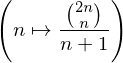

In [35]:
#definisco F
F=Lambda([n], 1/(n+1)*binomial(2*n,n))
F

In [34]:
4/9*C2(5)